In [1]:
%config IPCompleter.greedy=True

In [93]:
import os
import pandas as pd
from pathlib import Path
from dotenv import find_dotenv, load_dotenv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import scipy.stats as sp

### Set Directories

In [3]:
cd ~/Ames/Ames

C:\Users\scottwi\Ames\Ames


In [4]:

root_directory = os.getcwd()

train_data_path = os.path.join(root_directory, os.path.join('data', 'raw', 'train1.csv'))

### Import the data

In [5]:
train_dataframe = pd.read_csv(train_data_path)

### Get Info

In [6]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1222 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
train_dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Make scatter plots of continuous variables

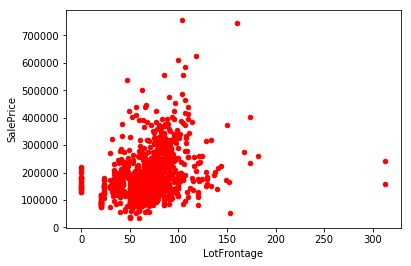

In [28]:
#train_dataframe.plot(kind='scatter', x='LotFrontage', y='SalePrice', color='red')


### Correlation and plotting functions
Pearson correlation for linear relationships.

Spearman for non-parametric correlations for non-linear relationships. Good when distribution is not normal or relationship
non-linear.

In [100]:
def myCorrPlot(col_name, input_dataframe):
    plt.suptitle("{}".format(col_name))
    yval = input_dataframe['SalePrice'].values
    xval = input_dataframe[col_name].values
    nas = np.logical_or(np.isnan(xval), np.isnan(yval))
    spearman = sp.spearmanr(xval[~nas], yval[~nas])
    plt.text(0,0, "spearman\'s r: " + str(round(spearman[0], 4)) + ", " + str(round(spearman[1], 4)))
    plt.scatter(xval[~nas], yval[~nas], c='red', alpha='0.2', )
    plt.show()

def pearson_list(cols, input_dataframe):
    answer = []
    for col in cols:
        yval = input_dataframe['SalePrice'].values
        xval = input_dataframe[col].values
        nas = np.logical_or(np.isnan(xval), np.isnan(yval))
        pearson = pearsonr(xval[~nas], yval[~nas])
        answer.append([col, round(pearson[0], 2), round(pearson[1], 2)])
    answer = sorted(answer, key=lambda x: abs(x[1]), reverse=True)
    return answer

def spearman_list(cols, input_dataframe):
    answer = []
    for col in cols:
        yval = input_dataframe['SalePrice'].values
        xval = input_dataframe[col].values
        nas = np.logical_or(np.isnan(xval), np.isnan(yval))
        spearman = sp.spearmanr(xval[~nas], yval[~nas])
        answer.append([col, round(spearman[0], 2), round(spearman[1], 2)])
    answer = sorted(answer, key=lambda x: abs(x[1]), reverse=True)
    return answer

In [61]:
cols = [       
'LotFrontage',
'LotArea',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',       
'BsmtFinSF2',       
'BsmtUnfSF',        
'TotalBsmtSF',      
#1stFlrSF,         
#2ndFlrSF,         
'LowQualFinSF',     
'GrLivArea',        
'BsmtFullBath',     
'BsmtHalfBath',     
'FullBath',         
'HalfBath',         
'BedroomAbvGr',     
'KitchenAbvGr',     
'TotRmsAbvGrd',     
'Fireplaces',       
'GarageYrBlt',      
'GarageCars',       
'GarageArea',       
'WoodDeckSF',       
'OpenPorchSF',      
'EnclosedPorch',    
#3SsnPorch,        
'ScreenPorch',      
'PoolArea',         
'MiscVal',                     
'YrSold']



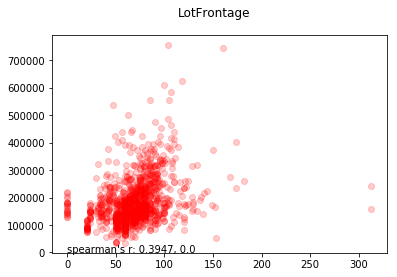

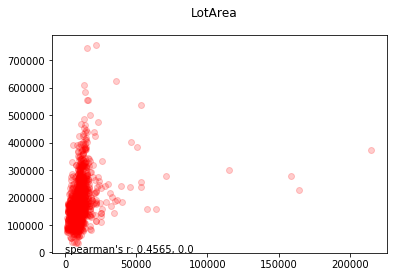

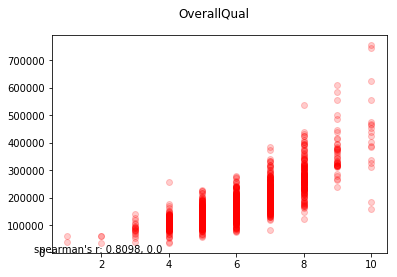

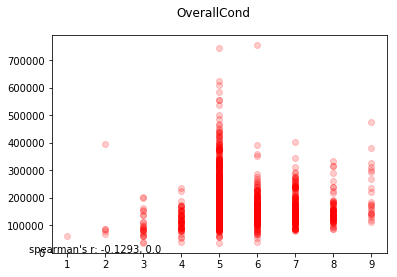

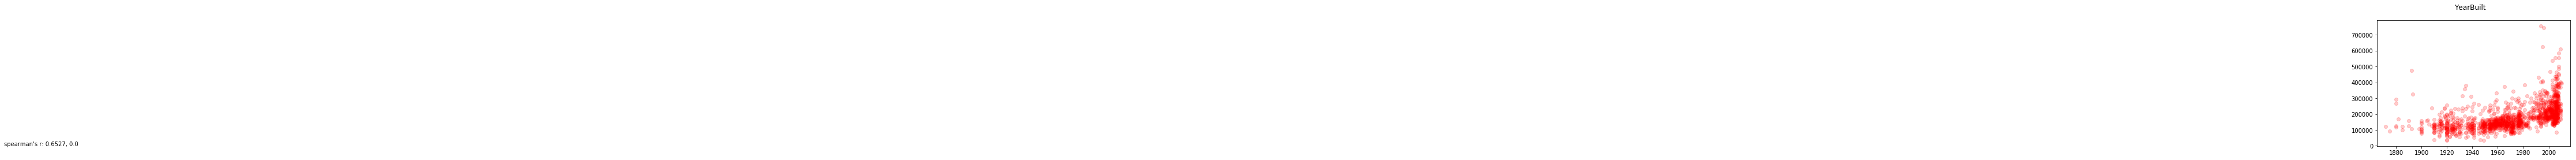

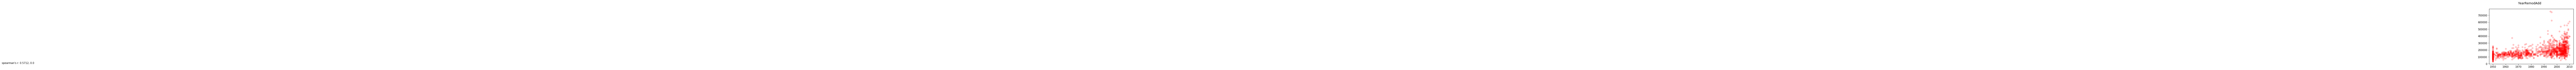

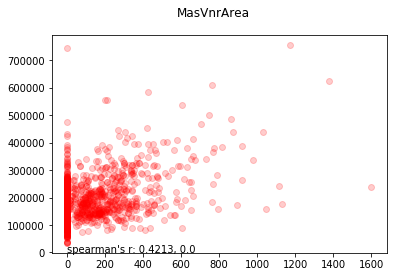

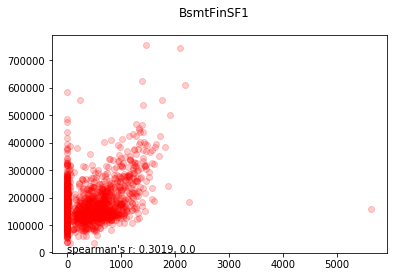

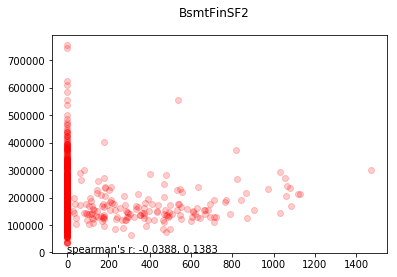

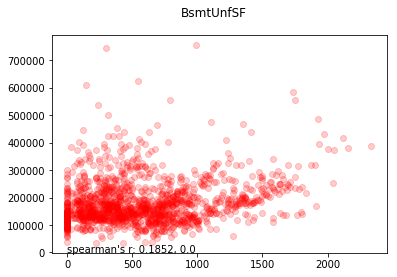

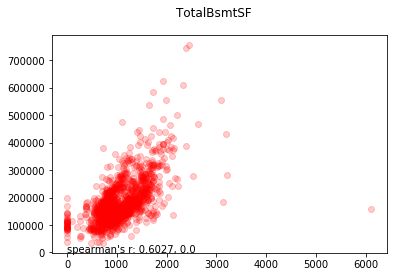

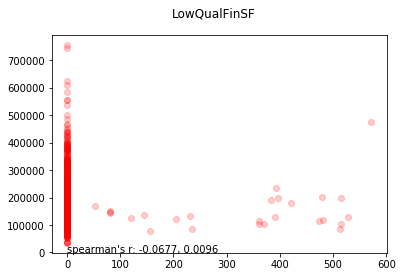

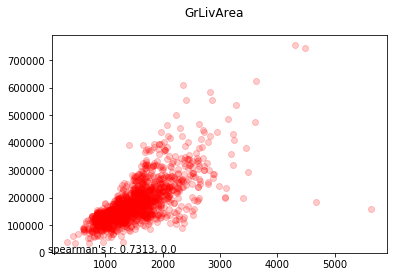

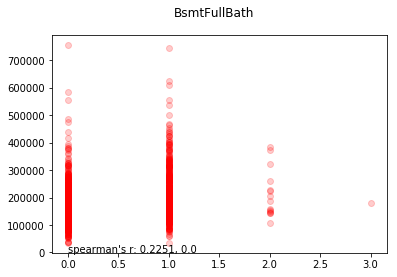

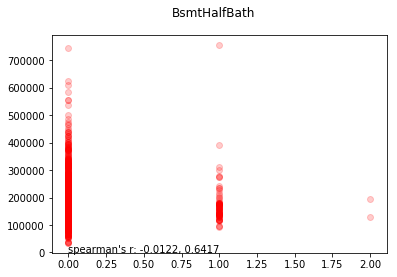

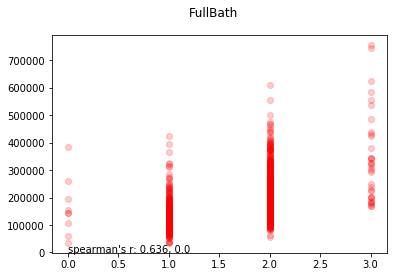

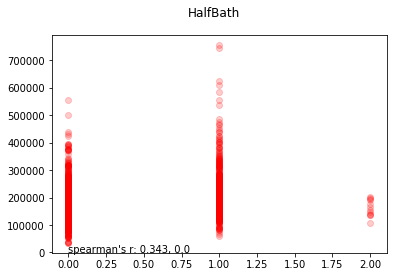

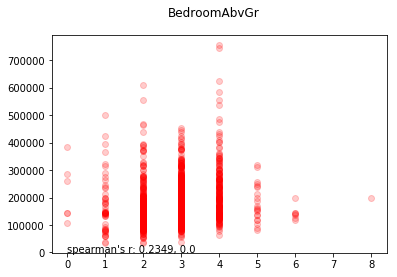

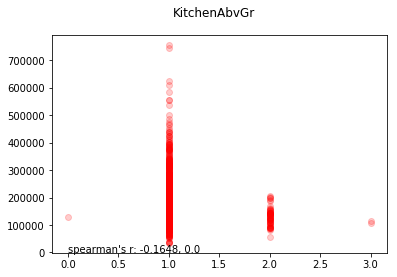

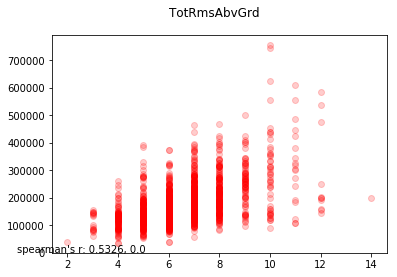

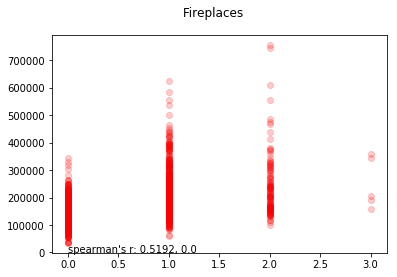

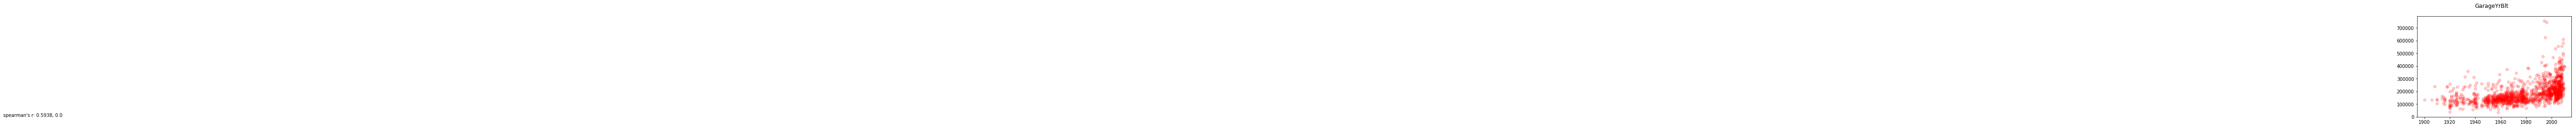

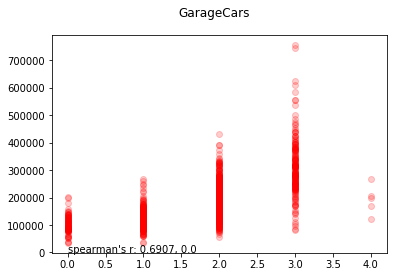

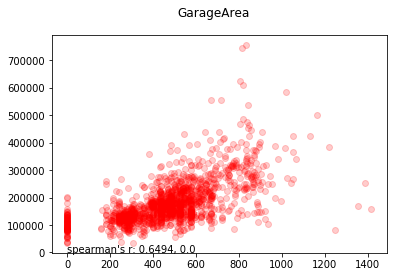

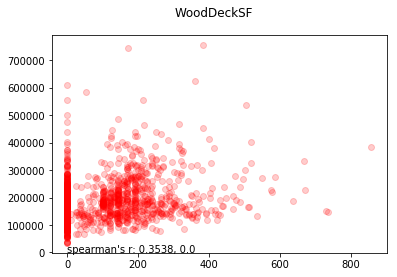

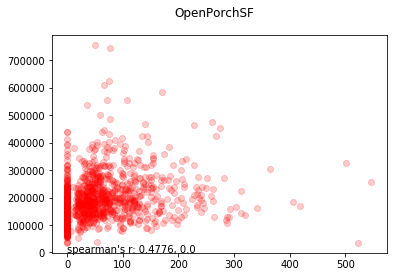

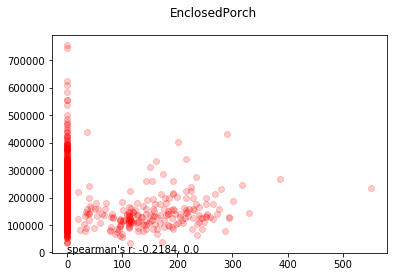

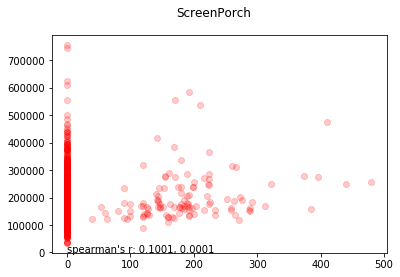

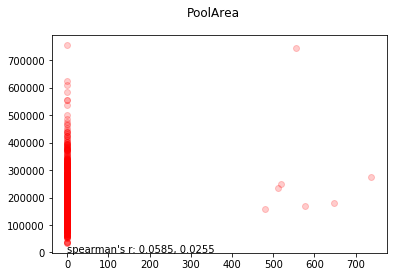

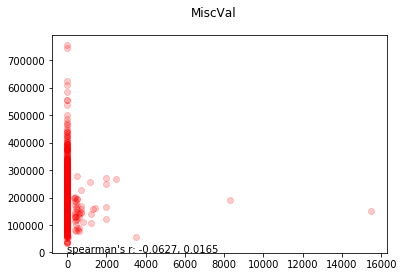

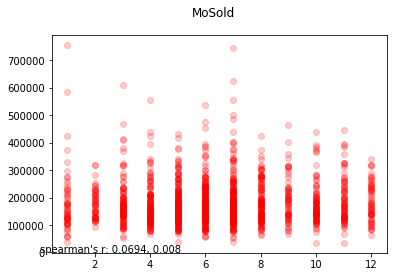

ValueError: Image size of 152294x277 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [103]:
for col in cols:
    myCorrPlot(col, train_dataframe)

In [85]:
pearson_list(cols, train_dataframe)

[['OverallQual', 0.79, 0.0],
 ['GrLivArea', 0.71, 0.0],
 ['GarageCars', 0.64, 0.0],
 ['GarageArea', 0.62, 0.0],
 ['TotalBsmtSF', 0.61, 0.0],
 ['FullBath', 0.56, 0.0],
 ['TotRmsAbvGrd', 0.53, 0.0],
 ['YearBuilt', 0.52, 0.0],
 ['YearRemodAdd', 0.51, 0.0],
 ['GarageYrBlt', 0.49, 0.0],
 ['MasVnrArea', 0.48, 0.0],
 ['Fireplaces', 0.47, 0.0],
 ['BsmtFinSF1', 0.39, 0.0],
 ['LotFrontage', 0.34, 0.0],
 ['WoodDeckSF', 0.32, 0.0],
 ['OpenPorchSF', 0.32, 0.0],
 ['HalfBath', 0.28, 0.0],
 ['LotArea', 0.26, 0.0],
 ['BsmtFullBath', 0.23, 0.0],
 ['BsmtUnfSF', 0.21, 0.0],
 ['BedroomAbvGr', 0.17, 0.0],
 ['KitchenAbvGr', -0.14, 0.0],
 ['EnclosedPorch', -0.13, 0.0],
 ['ScreenPorch', 0.11, 0.0],
 ['PoolArea', 0.09, 0.0],
 ['OverallCond', -0.08, 0.0],
 ['MoSold', 0.05, 0.08],
 ['LowQualFinSF', -0.03, 0.33],
 ['YrSold', -0.03, 0.27],
 ['BsmtHalfBath', -0.02, 0.52],
 ['MiscVal', -0.02, 0.42],
 ['BsmtFinSF2', -0.01, 0.66]]

In [101]:
spearman_list(cols, train_dataframe)

[['OverallQual', 0.81, 0.0],
 ['GrLivArea', 0.73, 0.0],
 ['GarageCars', 0.69, 0.0],
 ['YearBuilt', 0.65, 0.0],
 ['GarageArea', 0.65, 0.0],
 ['FullBath', 0.64, 0.0],
 ['TotalBsmtSF', 0.6, 0.0],
 ['GarageYrBlt', 0.59, 0.0],
 ['YearRemodAdd', 0.57, 0.0],
 ['TotRmsAbvGrd', 0.53, 0.0],
 ['Fireplaces', 0.52, 0.0],
 ['OpenPorchSF', 0.48, 0.0],
 ['LotArea', 0.46, 0.0],
 ['MasVnrArea', 0.42, 0.0],
 ['LotFrontage', 0.39, 0.0],
 ['WoodDeckSF', 0.35, 0.0],
 ['HalfBath', 0.34, 0.0],
 ['BsmtFinSF1', 0.3, 0.0],
 ['BsmtFullBath', 0.23, 0.0],
 ['BedroomAbvGr', 0.23, 0.0],
 ['EnclosedPorch', -0.22, 0.0],
 ['BsmtUnfSF', 0.19, 0.0],
 ['KitchenAbvGr', -0.16, 0.0],
 ['OverallCond', -0.13, 0.0],
 ['ScreenPorch', 0.1, 0.0],
 ['LowQualFinSF', -0.07, 0.01],
 ['MoSold', 0.07, 0.01],
 ['PoolArea', 0.06, 0.03],
 ['MiscVal', -0.06, 0.02],
 ['BsmtFinSF2', -0.04, 0.14],
 ['YrSold', -0.03, 0.25],
 ['BsmtHalfBath', -0.01, 0.64]]